# Hello, world!
write text here

In [2]:
import preprocessing  # Our preprocessing script
training_data = preprocessing.load_training_data()

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import IPython
# import IPython.display as ipd
import librosa
from librosa import display

def plot_durations_histogram(data_points):
    durations = [dp.duration for dp in data_points]
    # Histogram from the minimum to the 98-th percentile, to hide the outliers.
    percentiles = np.percentile(durations, [0, 50, 98, 100])
    print(percentiles)  # The median and the maximum are also of interest.
    _, ax = plt.subplots()
    bins = round(np.sqrt([len(data_points)])[0])
    ax.hist(durations, bins=np.linspace(percentiles[0], percentiles[2], num=bins))
    plt.show()

def peak_amplitude(audio):
    return max(abs(min(audio)), abs(max(audio)))
    
def plot_waveforms(data_points):
    for i, dp in enumerate(data_points):
        plt.figure(figsize=(14, 5))
        plt.figtext(0.5, 0.01, "clean {}".format(i+1))
        clean, sr = librosa.load(dp.clean_path)
        librosa.display.waveplot(clean, sr=sr)
        plt.show()
        plt.figure(figsize=(14, 5))
        plt.figtext(0.5, 0.01, "noisy {}".format(i+1))        
        noisy, sr = librosa.load(dp.noisy_path)
        librosa.display.waveplot(noisy, sr=sr)
        plt.show()
        
        
def plot_noise(data_point):
    clean, sr = librosa.load(data_point.clean_path)
    noisy, sr = librosa.load(data_point.noisy_path)
    noise = noisy - clean
    # ipd.display(ipd.Audio(noise, rate=sr))
    clean_peak = peak_amplitude(clean)
    noise_peak = peak_amplitude(noise)
    print('signal: {}, noise: {}, snr: {}'.format(clean_peak, noise_peak, clean_peak/noise_peak))
    stft = librosa.stft(noise)
    stft_db = librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')    

[ 1.092375    2.7229375   6.28806417 16.246875  ]


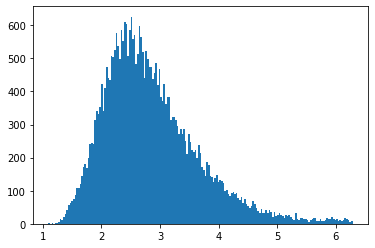

In [4]:
plot_durations_histogram(training_data)

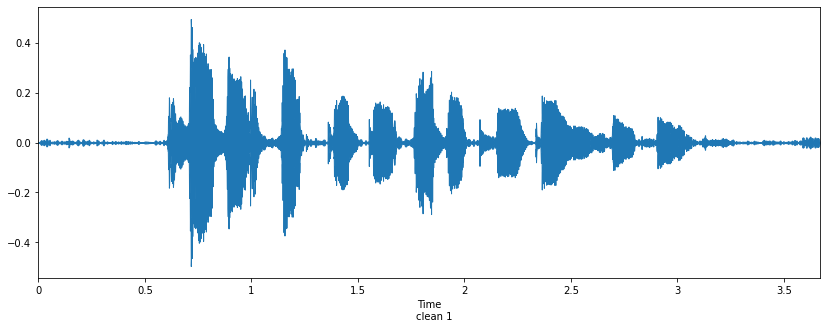

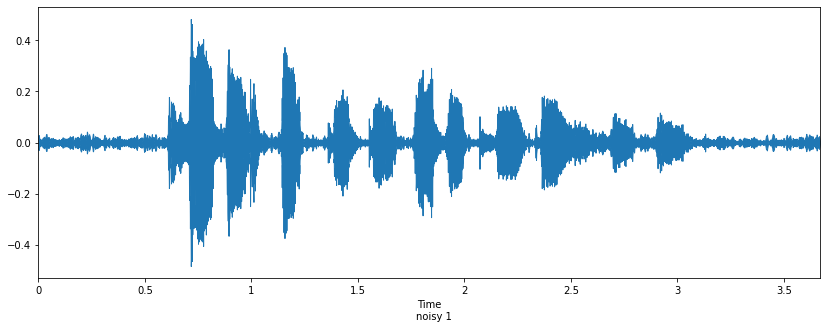

In [5]:
plot_waveforms([training_data[898]])

signal: 0.49579647183418274, noise: 0.038187168538570404, snr: 12.983325958251953
signal: 0.5074257850646973, noise: 0.0866687148809433, snr: 5.854774475097656
signal: 0.5004284381866455, noise: 0.06459259241819382, snr: 7.747458457946777


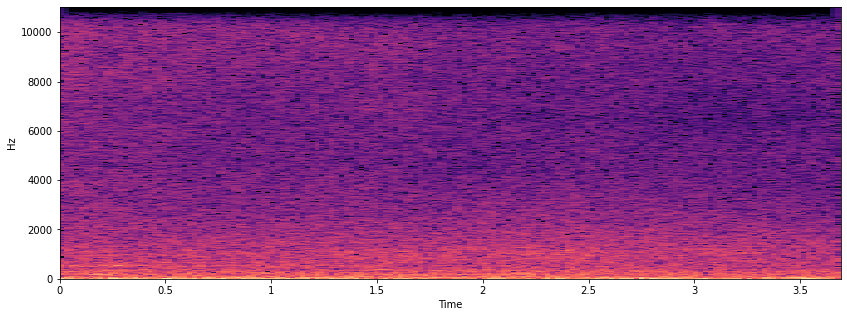

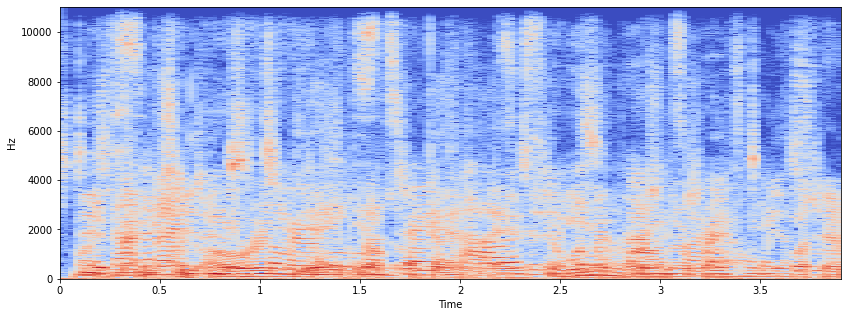

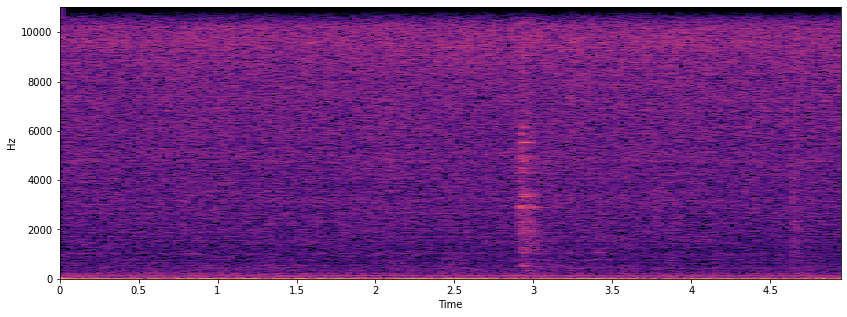

In [8]:
plot_noise(training_data[898])
plot_noise(training_data[1])
plot_noise(training_data[10000])